In [1]:
from random import Random
SEED=5
def generate_pnts(N=1):
  random_gen=Random(SEED)
  lst_x,lst_y=[],[]
  for _ in range (N):
    lst_x.append(random_gen.uniform(0,1.))
  for _ in range (N):
    lst_y.append(random_gen.uniform(0,1.))
  return lst_x,lst_y
data_x, data_y = generate_pnts(N = 2)

In [3]:
from node import Node
x_p, y_p = Node(val = 0.3), Node(val = 0.3)
def loss_graph(x_p, y_p, data_x, data_y):
    loss = 0
    for xi, yi in zip(data_x,data_y):
        loss += ((xi - x_p)**2 + (yi - y_p)**2)**0.5
    return (1/len(data_x))*loss 
loss = loss_graph(x_p, y_p, data_x, data_y)
loss.backward()
print(f"loss: {loss.val}, grad: {[x_p.grad,y_p.grad]}")

loss: 0.6854306036670386, grad: [-0.5564128548486142, -0.8308151887980484]


In [4]:
import torch
data=torch.tensor([data_x,data_y])
data=data.t()
pnt=torch.tensor([0.3,0.3])
pnt.requires_grad=True
pnt.retain_grad()
torch_loss=torch.mean(torch.sqrt(((pnt-data)**2).sum(dim=1)))
torch_loss.backward()
print(f"loss: {torch_loss}, torch_grad: {pnt.grad.data.tolist()}")

loss: 0.6854305863380432, torch_grad: [-0.5564128160476685, -0.8308151960372925]


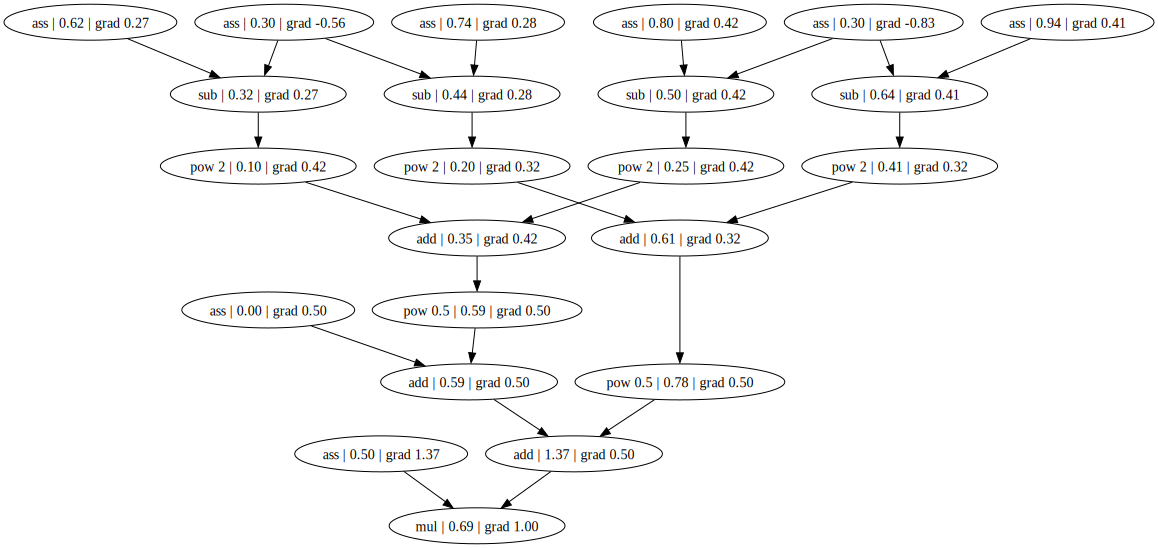

In [5]:
loss.draw_graph()